In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

from src.basic.load_network import load_mtx, load_graph_from_place
from src.metrics.search_information import average_search_information
from src.metrics.loops import count_triangles, count_squares
from src.plot.loops_plot import plot_loops
from src.plot.degree_distribution import plot_degree_distribution
from src.plot.graph_plot import graph_plot

/home/renan_gonzales/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


# Carga

Escolhas:
 - Boa Vista (RR): 400.000 habitantes
 - Bauru (SP): 380.000
 - Maringá (PR): 409.000
 - Campina Grande (PB): 420.000

In [3]:
graph_dict = dict()

In [4]:
cidade = "Boa Vista, Roraima, Brazil"
G_BV = load_graph_from_place(cidade)
print(f"Grafo carregado: {G_BV.number_of_nodes()} nós e {G_BV.number_of_edges()} arestas. Densidade: {nx.density(G_BV):.5f}")
graph_dict[cidade.split(",")[0]] = G_BV

Grafo carregado: 10680 nós e 17697 arestas. Densidade: 0.00031


In [5]:
cidade = "Bauru, São Paulo, Brazil"
G_BAU = load_graph_from_place(cidade)
print(f"Grafo carregado: {G_BAU.number_of_nodes()} nós e {G_BAU.number_of_edges()} arestas. Densidade: {nx.density(G_BAU):.5f}")
graph_dict[cidade.split(",")[0]] = G_BAU

Grafo carregado: 12174 nós e 19589 arestas. Densidade: 0.00026


In [6]:
cidade = "Maringá, Paraná, Brazil"
G_MAR = load_graph_from_place(cidade)
print(f"Grafo carregado: {G_MAR.number_of_nodes()} nós e {G_MAR.number_of_edges()} arestas. Densidade: {nx.density(G_MAR):.5f}")
graph_dict[cidade.split(",")[0]] = G_MAR

Grafo carregado: 11508 nós e 18331 arestas. Densidade: 0.00028


In [7]:
cidade = "Campina Grande, Paraíba, Brazil"
G_CG = load_graph_from_place(cidade)
print(f"Grafo carregado: {G_CG.number_of_nodes()} nós e {G_CG.number_of_edges()} arestas. Densidade: {nx.density(G_CG):.5f}")
graph_dict[cidade.split(",")[0]] = G_CG

Grafo carregado: 12639 nós e 18674 arestas. Densidade: 0.00023


In [8]:
graph_dict

{'Boa Vista': <networkx.classes.graph.Graph at 0x7f4f63391fa0>,
 'Bauru': <networkx.classes.graph.Graph at 0x7f4f87d74cd0>,
 'Maringá': <networkx.classes.graph.Graph at 0x7f4f723c2730>,
 'Campina Grande': <networkx.classes.graph.Graph at 0x7f4f87b10130>}

# Exploratória inicial

In [9]:
for city in graph_dict:
    G = graph_dict[city]
    components = list(nx.connected_components(G))
    largest_component = max(components, key=len)
    G_largest = G.subgraph(largest_component).copy()

    print(f"Análise de {city}:")
    print(f"    1. Número de componentes conexos: {len(components)}")
    print(f"    2. Tamanho do maior componente conexo: {G_largest.number_of_nodes()} nós")

Análise de Boa Vista:
    1. Número de componentes conexos: 1
    2. Tamanho do maior componente conexo: 10680 nós
Análise de Bauru:
    1. Número de componentes conexos: 1
    2. Tamanho do maior componente conexo: 12174 nós
Análise de Maringá:
    1. Número de componentes conexos: 1
    2. Tamanho do maior componente conexo: 11508 nós
Análise de Campina Grande:
    1. Número de componentes conexos: 1
    2. Tamanho do maior componente conexo: 12639 nós


Análise de Boa Vista:
    1. Grau mínimo: 1
    2. Grau máximo: 5
    3. Grau médio: 3.31
    4. Grau mediano: 3.0
Análise de Bauru:
    1. Grau mínimo: 1
    2. Grau máximo: 6
    3. Grau médio: 3.22
    4. Grau mediano: 3.0
Análise de Maringá:
    1. Grau mínimo: 1
    2. Grau máximo: 6
    3. Grau médio: 3.19
    4. Grau mediano: 3.0
Análise de Campina Grande:
    1. Grau mínimo: 1
    2. Grau máximo: 5
    3. Grau médio: 2.95
    4. Grau mediano: 3.0


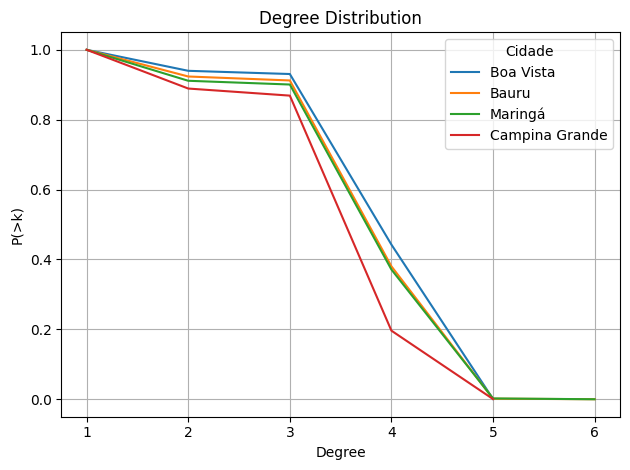

In [42]:
lines = list()
labels = list()

for city in graph_dict:
    G = graph_dict[city]
    print(f"Análise de {city}:")

    degrees = [d for n, d in G.degree()]
    print(f"    1. Grau mínimo: {np.min(degrees)}")
    print(f"    2. Grau máximo: {np.max(degrees)}")
    print(f"    3. Grau médio: {np.mean(degrees):.2f}")
    print(f"    4. Grau mediano: {np.median(degrees)}")

    plot_degree_distribution(G)

    line = plt.gca().lines[-1]
    lines.append(line)
    labels.append(city)

plt.legend(lines, labels, title='Cidade')
plt.tight_layout()
plt.show()

In [45]:
for city in graph_dict:
    G = graph_dict[city]
    components = list(nx.connected_components(G))
    largest_component = max(components, key=len)
    G_largest = G.subgraph(largest_component).copy()
    print(f"Análise de {city}:")

    print(f"    1. Diâmetro do maior componente: {nx.diameter(G_largest)}")
    print(f"    2. Distância média: {nx.average_shortest_path_length(G_largest):.2f}")

Análise de Boa Vista:
    1. Diâmetro do maior componente: 158
    2. Distância média: 54.44
Análise de Bauru:
    1. Diâmetro do maior componente: 100
    2. Distância média: 42.80
Análise de Maringá:
    1. Diâmetro do maior componente: 99
    2. Distância média: 45.39
Análise de Campina Grande:
    1. Diâmetro do maior componente: 161
    2. Distância média: 58.81


In [46]:
for city in graph_dict:
    G = graph_dict[city]
    print(f"Análise de {city}:")

    n_triangles = count_triangles(G)
    n_squares = count_squares(G)

    print(f"    1. Número de triângulos: {n_triangles}")
    print(f"    2. Número de quadrados: {n_squares}")

Análise de Boa Vista:
    1. Número de triângulos: 1116
    2. Número de quadrados: 15
Análise de Bauru:
    1. Número de triângulos: 2010
    2. Número de quadrados: 28
Análise de Maringá:
    1. Número de triângulos: 1026
    2. Número de quadrados: 9
Análise de Campina Grande:
    1. Número de triângulos: 1839
    2. Número de quadrados: 27
